# **Part 1**

A relevant proportion of retail bank profit comes from interests on home loans. This activity is profitable as well as risky: even if mortgages can secure lenders from the occurrence of defaulting borrowers, bad loans eat up the main bulk of profits.
The bank's consumer credit deparment introduced heuristics into the loan approval process, but this method is exposed to shortcomings of human analysis: inefficiency and proneness to errors.
Modern data science techniques overcome the abovementioned issues by framing the problem of creditworthness as a binary classification task.
Visualization techniques help in getting a better understanding of the data at hand, and algorithms are able to extract patterns that would be hidden to the human eye. Finally, several metrics have been developed in order to measure the performance of different techniques.
The goal of this project is to support the credit department by:
<ul>
<li>providing insights on historical data of home loans to understand which features are important in the discrimination between good and bad borrowers and how.</li>
<li>developing an automated model able to predict the creditworthiness of new applicants, with a particular focus on the minimization of NPA.</li>
</ul>
The final objective is the maximization of the bank's potential profit, achieved through the minimization of the number of potential defaulters, as predicted by the classifier in production.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy() 

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

The data concerned has almost 6000 observations and 13 columns, whereas rows collect historical data of recent home equity loans that were approved and columns are the tracked variables.

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

<ul>
  <li><b>BAD</b> is the target variable, a binary feature of 0s and 1s.</li>
  <li><b>LOAN</b> is an amount, and will be more properly casted to float64 in the following code block.</li>
  <li><b>REASON</b> and <b>JOB</b> are nominal data, for analysis purposes they will be converted through one hot encoding.</li>
  <li>All remaining variables are continuous with float64 data type.
</ul>

### **Convert the data types**

In [8]:
# Casting LOAN to float64
data.LOAN=data.LOAN.astype("float64")
data.dtypes
cols = data.select_dtypes(['object']).columns.tolist()

# Changing the data type of object type column to category
for i in cols:
    data[i] = data[i].astype("category")
    
# Checking the info again together with the datatype of different variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   float64 
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(2), float64(10), int64(1)
memory usage: 524.3 KB


### **Check for missing values**

In [9]:
# Analyse missing values 
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Check the percentage of missing values in the each column
round(data.isnull().sum()/data.shape[0]*100,2)

BAD         0.00
LOAN        0.00
MORTDUE     8.69
VALUE       1.88
REASON      4.23
JOB         4.68
YOJ         8.64
DEROG      11.88
DELINQ      9.73
CLAGE       5.17
NINQ        8.56
CLNO        3.72
DEBTINC    21.26
dtype: float64

The simplest strategy to deal with missing values is simply dropping them. Let's check its cost in terms of information loss on historical data.

In [11]:
# Checking unbalance in data 
print(round(data.BAD.value_counts(normalize=True)*100,2))
print('*'*40)

# Checking the proportion of missing values as a whole and by isolating for BAD and not BAD
print("% of missing values ",round((1-data.dropna(inplace=False).shape[0]/data.shape[0])*100,2))
print("% of missing values for not BAD",round((1-data[data.BAD==0].dropna(inplace=False).shape[0]/data[data.BAD==0].shape[0])*100,2))
print("% of missing values for BAD",round((1-data[data.BAD==1].dropna(inplace=False).shape[0]/data[data.BAD==1].shape[0])*100,2))

0    80.05
1    19.95
Name: BAD, dtype: float64
****************************************
% of missing values  43.56
% of missing values for not BAD 35.78
% of missing values for BAD 74.77


By removing rows with NaNs, we miss almost half of data. Furthermore, <b>BAD</b> borrowers are only about 20% of the total, of which 3/4 have missing values. This strategy must be avoided.<br>
Missing values of <b>DEBTINC</b> are beyond 20%. We need to check whether it carries or not any useful information. At the same time, we check if there are any redundant numerical variables.

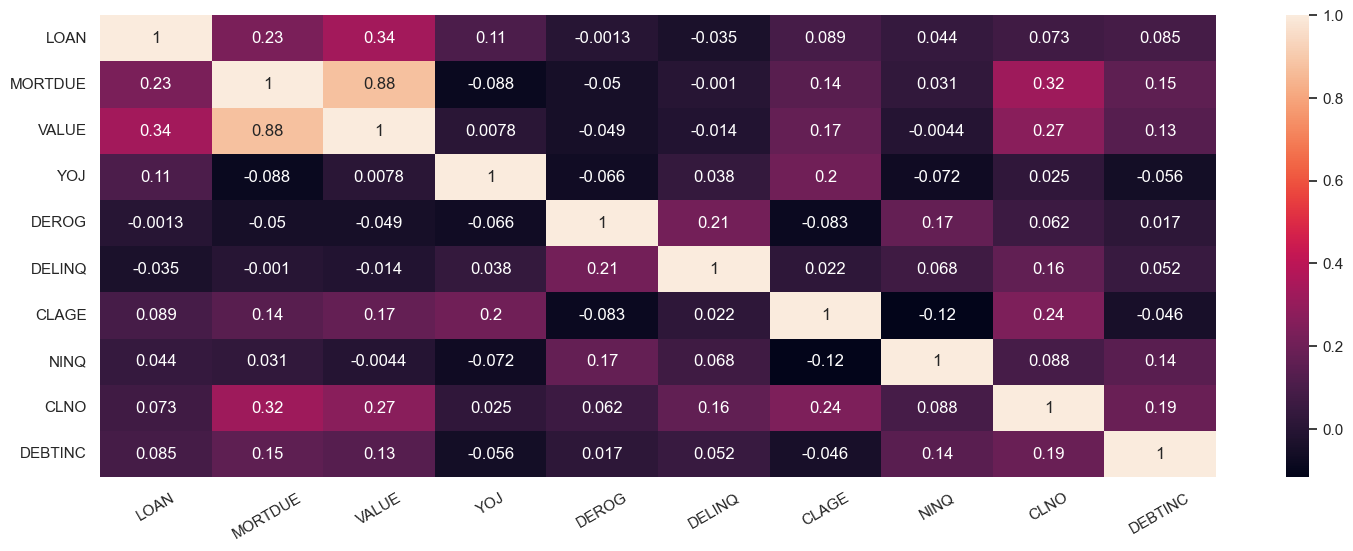

In [12]:
# Creating a list of numerical columns in the data frame
num_columns=[]
for column in data.columns:
    if data[column].dtype=="float64":
        num_columns.append(column)  

# Creating a heatmap for correlation analysis
fig = plt.figure(figsize = (18, 6))
sns.heatmap(data[num_columns].corr(), annot = True);
plt.xticks(rotation = 30);

There are not repeated variables. <b>MORTDUE</b> and <b>VALUE</b> have the highest correlation, yet not to an extent to imply multi-collinearity.

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

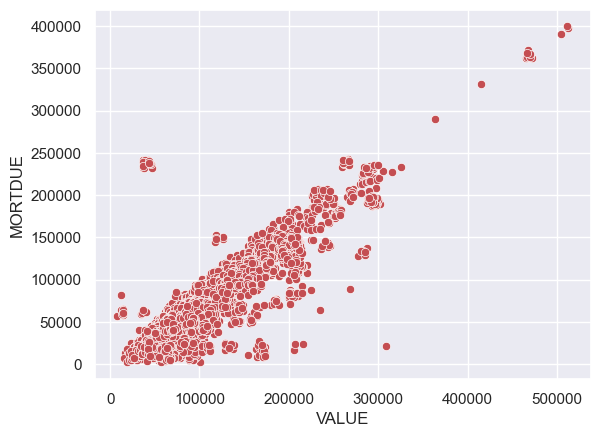

In [13]:
# Scatterplot for MORTDUE and VALUE
fig = plt.figure(facecolor=(1, 1, 1))
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu",color='r')

The upward trend in the graph above is rather evident and points seem almost to lie on the same lower-dimensional subspace, meaning that there is a high positive correlation between the two variables. From a practical perspective, it makes a lot of sense having a high correlation between the estimated market value and the guaranteed mortgage required to protect the lender in case the  borrower defaults.<br>
However, the main purpose of the correlation heatmap was to detect if any variable carried (almost) the same information as <b>DEBTINC</b>, which is the variable with many missing values. Anyway, the variable concerned does not have any significant correlation with any other variable, therefore we should keep it and define a missing value imputation strategy.

array([[<AxesSubplot:title={'center':'LOAN'}>,
        <AxesSubplot:title={'center':'MORTDUE'}>,
        <AxesSubplot:title={'center':'VALUE'}>],
       [<AxesSubplot:title={'center':'YOJ'}>,
        <AxesSubplot:title={'center':'DEROG'}>,
        <AxesSubplot:title={'center':'DELINQ'}>],
       [<AxesSubplot:title={'center':'CLAGE'}>,
        <AxesSubplot:title={'center':'NINQ'}>,
        <AxesSubplot:title={'center':'CLNO'}>],
       [<AxesSubplot:title={'center':'DEBTINC'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

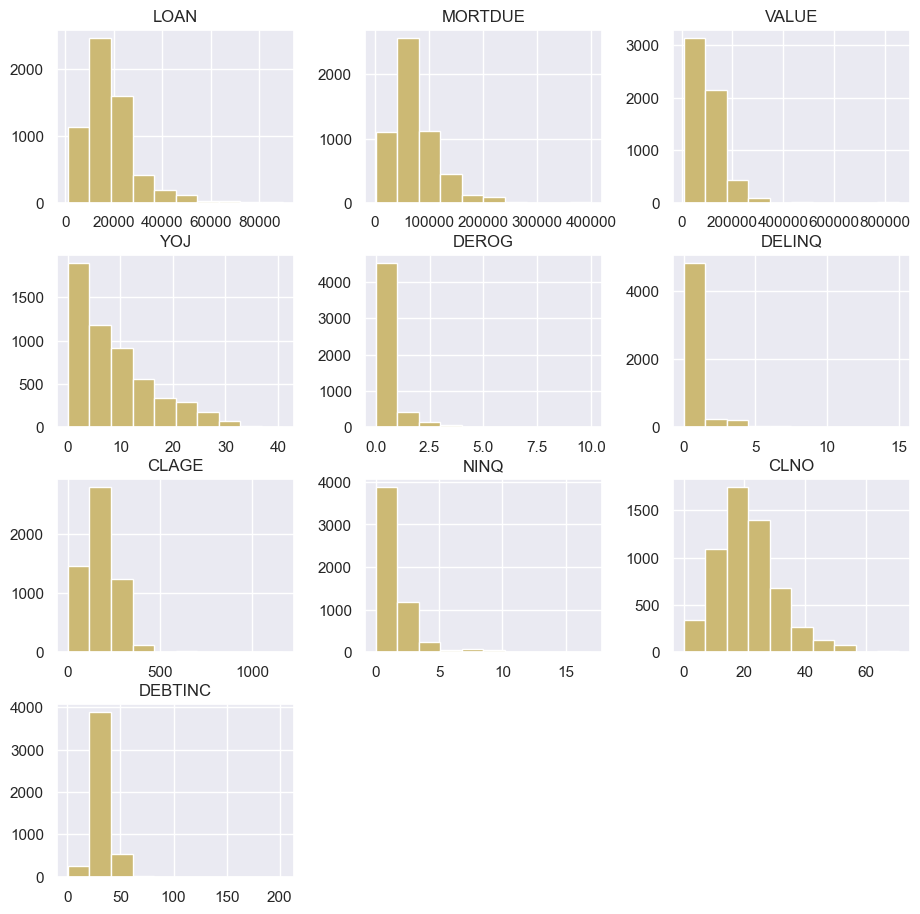

In [14]:
# Let's explore the histograms of numerical columns in dataset.
data[num_columns].hist(figsize=(11,11),color='y')

<ul>
    <li><b>LOAN</b>, <b>MORTDUE</b> and <b>VALUE</b> are skewed to the right. These numerical features quantifying the value of the loan, mortgage and property indicate that some loans take higher values.</li>  
    <li>The histogram of <b>YOJ</b> is decreasing. Many applicants are new joiners at their jobs, and fewer applicants have higher "seniority". This may be a signal that the majority of new requests come from younger applicants (older ones may not need a new loan because they already have one or already have repaid the debt).</li>
    <li>Most of values of <b>DEROG</b>, <b>DELINQ</b> and <b>NINQ</b> are clustered around their modal classes, with some values in the upper classes; meaning that the majority of applicants are free from bad behaviours or have few.</li>
    <li><b>DEBTINC</b> values tend to cluster around its mode as well.</li>
    <li><b>CLAGE</b> and <b>CLNO</b> seem to be almost normally distributed, yet <b>CLNO</b> seem to be slightly right skewed.  Further investigation about their distribution are required.</li>
</ul>

In order to treat missing values by inputing a particular statistics, a basic approach would be calculating the most appropriate statistics for each variable and use it to fill every missing value, independently from the <b>BAD</b> category it belongs to.<br>
However, this choice is underpinned by a very general assumption which is that all the samples are drawn from the same population. With this perspective, values in different <b>BAD</b> group will be treated equally.</b>
Anyway, a more comprehensive analysis would check the distribution of each variable whilst controlling for each <b>BAD</b> category. If the two sample distributions appear very different (and we have enough values in each group), then we can infer with some confidence that there are two separate distributions from which samples are drawn, one for each <b>BAD</b> category. By imputing two different statistics for the variable, each one calculate on the values of each <b>BAD</b> category, the substitution of missing values will retain this sort of distinction. In case this is verified, it will help algorithms learn some more distinctive patterns at classification time.</b>

In [15]:
# Creating small Data Frames for each numerical feature with missing values to compare main statistics
statistics=['mean','median','std','min','max']
for column in data.columns[(data.isnull().sum()!=0)&(data.dtypes!="category")]:  # Iterating over numerical features with missing values
    multiIndexDf1=data.groupby("BAD").agg({column:statistics})
    d=[data[column].mean(),data[column].median(),data[column].std(),data[column].min(),data[column].max()]
    header1=pd.MultiIndex.from_product([[column],statistics])
    multiIndexDf2=pd.DataFrame(data=[d],columns=header1,index=["All"])
    header2=pd.MultiIndex.from_product([[column],["count"]])
    multiIndexDf3=pd.DataFrame(data=[data[column][data.BAD==0].notnull().sum(),data[column][data.BAD==1].notnull().sum(),data[column].notnull().sum()],columns=header2,index=["0","1","All"])
    multiIndexDf3=multiIndexDf1.append(multiIndexDf2)
    multiIndexDf3[column,"count"]=[data[column][data.BAD==0].notnull().sum(),data[column][data.BAD==1].notnull().sum(),data[column].notnull().sum()]
    print(np.round(multiIndexDf3,2))
    print('*'*60)

# Delete unnecessary Data Frames
del multiIndexDf1,multiIndexDf2,multiIndexDf3

      MORTDUE                                           
         mean   median       std     min       max count
0    74829.25  66839.0  43584.99  2619.0  371003.0  4359
1    69460.45  60279.0  47588.19  2063.0  399550.0  1083
All  73760.82  65019.0  44457.61  2063.0  399550.0  5442
************************************************************
         VALUE                                           
          mean   median       std     min       max count
0    102595.92  90659.0  52748.39  8000.0  471827.0  4764
1     98172.85  82000.0  74339.82  8800.0  855909.0  1084
All  101776.05  89235.5  57385.78  8000.0  855909.0  5848
************************************************************
      YOJ                              
     mean median   std  min   max count
0    9.15    7.0  7.68  0.0  36.0  4321
1    8.03    6.0  7.10  0.0  41.0  1124
All  8.92    7.0  7.57  0.0  41.0  5445
************************************************************
    DEROG                              
  

Since there is an appropriate minimum number of instances in each variable for each <b>BAD</b> category, the analysis will proceed by isolating each variable for <b>BAD</b> categories.

**Features with high correlation**

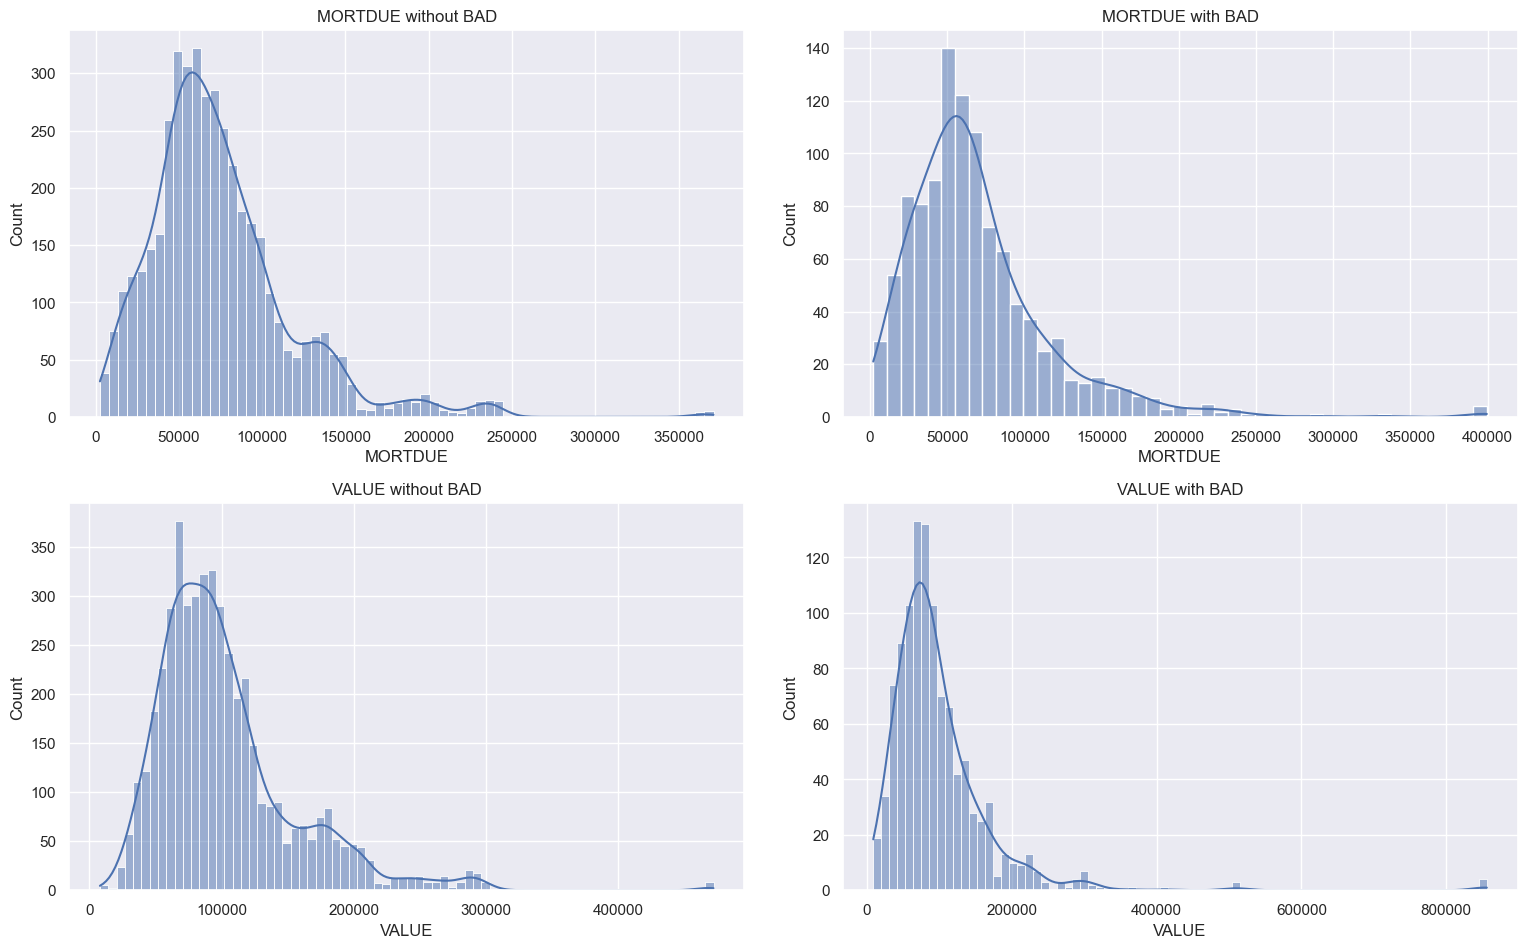

In [16]:
# Histograms for MORTDUE and VALUE after grouping by BAD
fig, axes=plt.subplots(2,2,figsize=(16,10))
fig.tight_layout(pad=3.2)
sns.histplot(x="MORTDUE",data=data[data.BAD==0],kde=True,ax=axes[0,0]).set(title="MORTDUE without BAD");
sns.histplot(x="MORTDUE",data=data[data.BAD==1],kde=True,ax=axes[0,1]).set(title="MORTDUE with BAD");
sns.histplot(x="VALUE",data=data[data.BAD==0],kde=True,ax=axes[1,0]).set(title="VALUE without BAD");
sns.histplot(x="VALUE",data=data[data.BAD==1],kde=True,ax=axes[1,1]).set(title="VALUE with BAD");

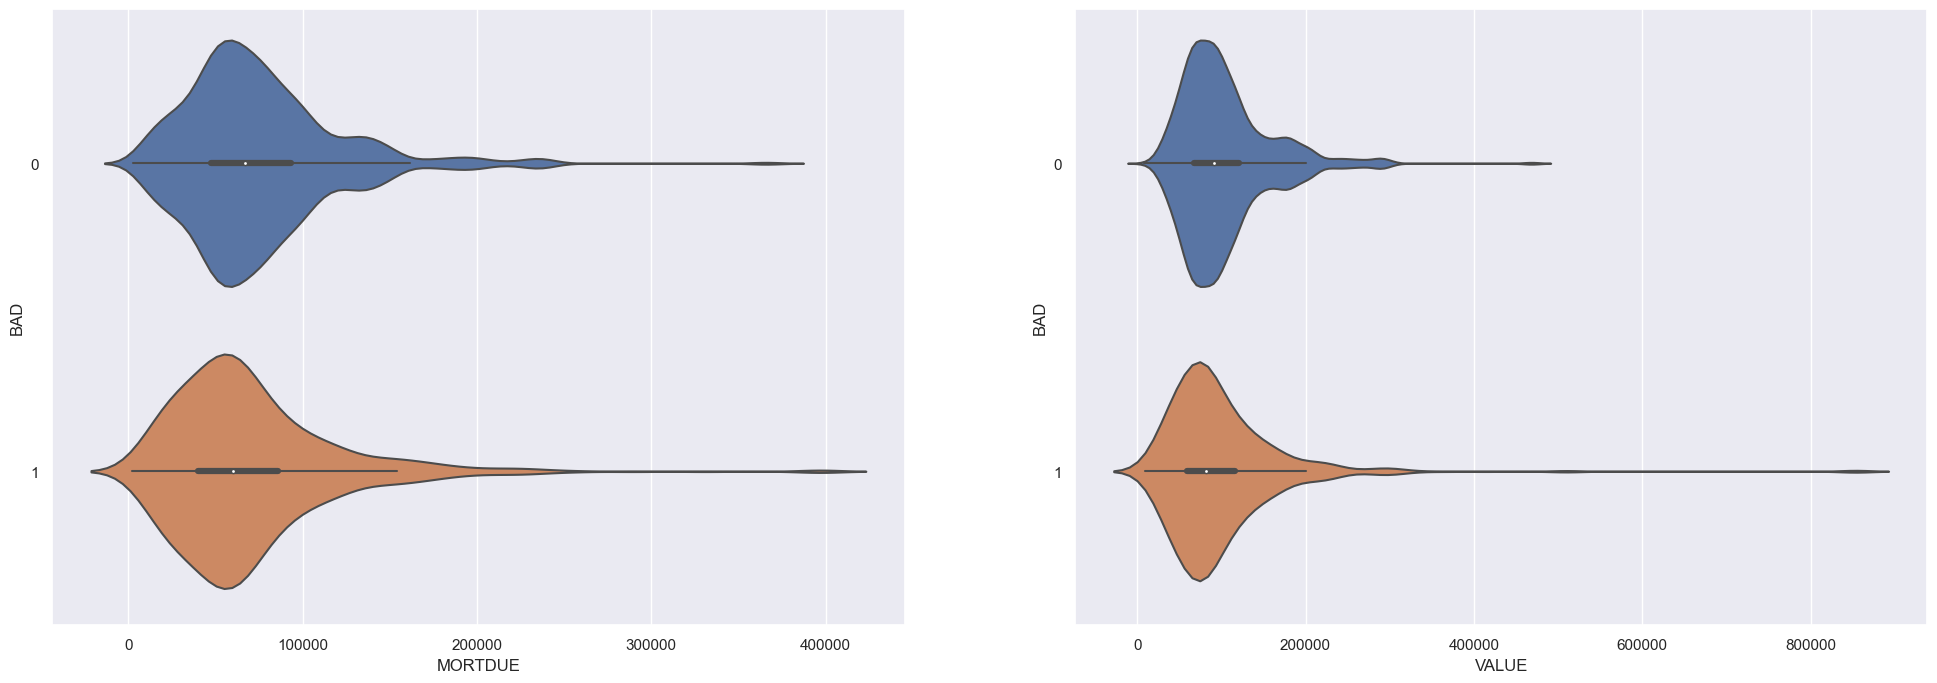

In [17]:
# Violin plots for MORTDUE and VALUE after grouping by BAD
plt.figure(figsize=(10,8))
plt.subplots_adjust(right=2)
plt.subplot(121)
sns.violinplot(y="BAD",x="MORTDUE",data=data,orient='h');
plt.subplot(122)
sns.violinplot(y="BAD",x="VALUE",data=data,orient='h');

It seems that the difference in mean and std for both variables depends more on the presence of outliers in the whole variable than on different structures for each <b>BAD</b> group. Therefore, the strategy will be inputing the median.

**Feature YOJ**

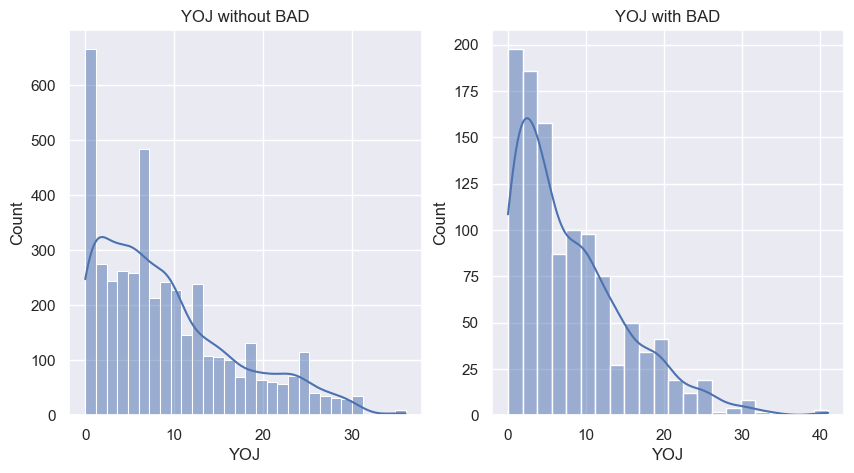

In [18]:
# Histograms for YOJ after grouping by BAD
fig, axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(x="YOJ",data=data[data.BAD==0],kde=True,ax=axes[0]).set(title="YOJ without BAD");
sns.histplot(x="YOJ",data=data[data.BAD==1],kde=True,ax=axes[1]).set(title="YOJ with BAD");

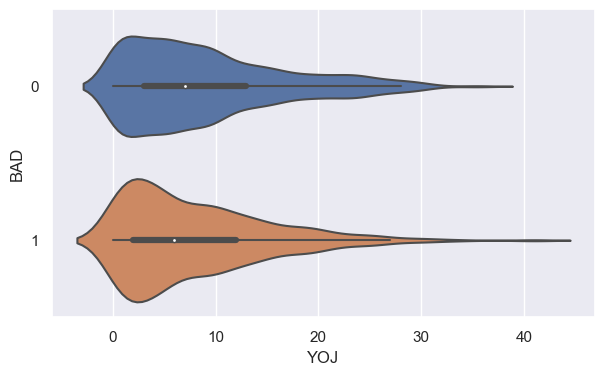

In [19]:
# Violin plot for YOJ after grouping by BAD
plt.figure(figsize=(7,4))
sns.violinplot(y="BAD",x="YOJ",data=data,orient='h');

The histogram for <b>BAD</b> applicants decays more abruptly on the right side than that for not <b>BAD</b>. Other than that, there is no significative difference between the two subgroups. The strategy for missing value imputation will be the median.

**Features with a strong central tendency**

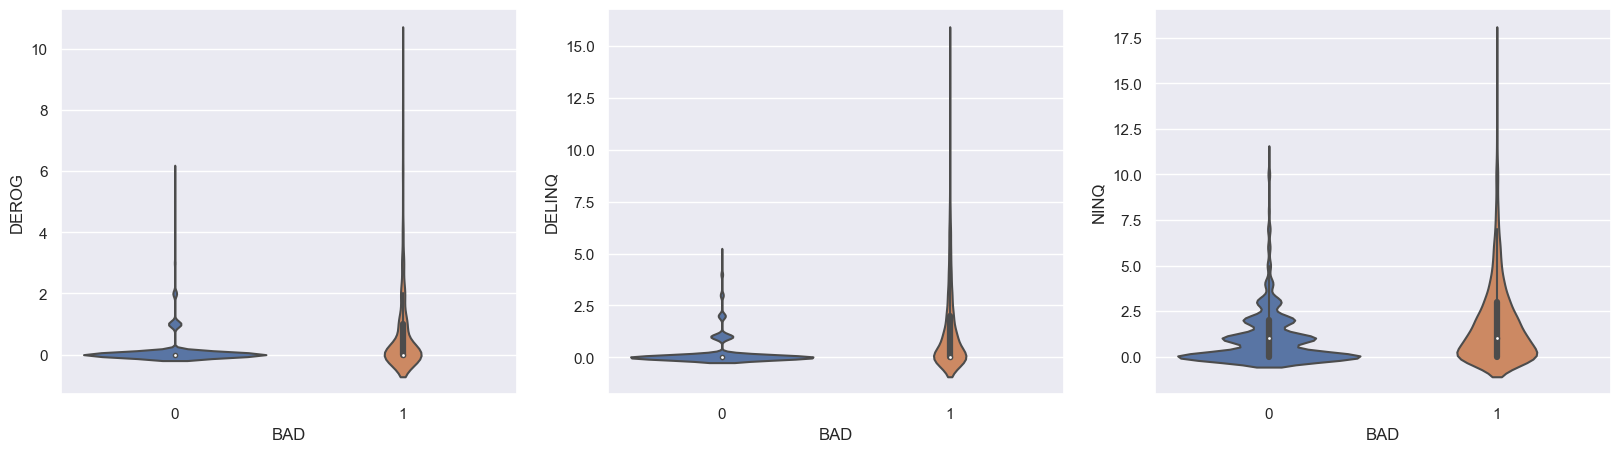

In [20]:
# Violin plots for DEROG, DELINQ and NINQ after grouping by BAD
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.violinplot(x="BAD",y="DEROG",data=data);
plt.subplot(132)
sns.violinplot(x="BAD",y="DELINQ",data=data);
plt.subplot(133)
sns.violinplot(x="BAD",y="NINQ",data=data);

As already discussed, the long right skew in the distribution is associated to a negative behaviour on borrower side. This is rather evident after the grouping, where the distribution grouped by <b>BAD</b> has a much longer right tail than that of not <b>BAD</b>. Furthermore, the density around the central tendency is greater for the not <b>BAD</b> group.<br>As long as the two sub-distributions are quite different, using a statistics for each group while inputing missing values makes more sense than using a statistics calculated on the whole variable, and mean will be used as a statistic since it is more distinctive for this set of features.<br>
Furthermore, all of them provide insights about the reliability of the borrower: higher values denote repeated negative behaviours, and this is reflected in the grouping (smaller mean by grouping for not <b>BAD</b>, higher mean by grouping for <b>BAD</b>). To involve missing values in this pattern, the imputation will be performed using the mean of each <b>BAD</b> group.<br>
Note that these variables take only discrete values.

In [21]:
# Cheking variables taking discrete values
modalVariables=["DEROG","DELINQ","NINQ"]
for variable in modalVariables:
    print("Distinct items in ",variable,set(data[variable].dropna(inplace=False)))

Distinct items in  DEROG {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
Distinct items in  DELINQ {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 15.0}
Distinct items in  NINQ {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 17.0}


**Feature DEBTINC**

<b>DEBTINC</b> shows a strong central tendency, but it is analyzed separately from the previous <b>DEROG</b>, <b>DELINQ</b> and <b>NINQ</b> as it takes continuous values.

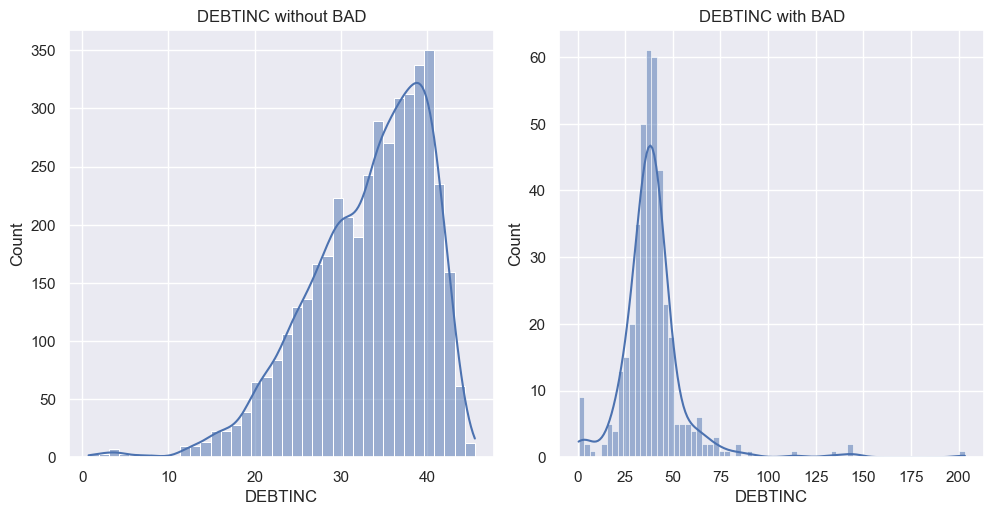

In [22]:
# Histogram for DEBTINC after grouping by BAD
fig, axes=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=1.2)
sns.histplot(x="DEBTINC",data=data[data.BAD==0],kde=True,ax=axes[0]).set(title="DEBTINC without BAD");
sns.histplot(x="DEBTINC",data=data[data.BAD==1],kde=True,ax=axes[1]).set(title="DEBTINC with BAD");

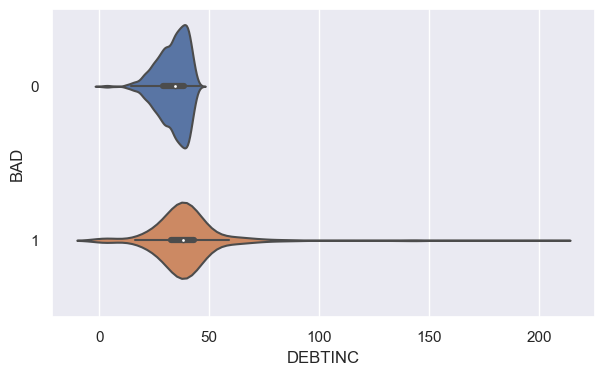

In [23]:
# Violin plot for DEBTINC after grouping by BAD
plt.figure(figsize=(7,4))
sns.violinplot(y="BAD",x="DEBTINC",data=data,orient='h');

The two sub-distribution are different with regards to the range, skewness and density around the central tendency. The median of each <b>BAD</b> group will be substituted. 

**Features sharing appearent normal distribution**

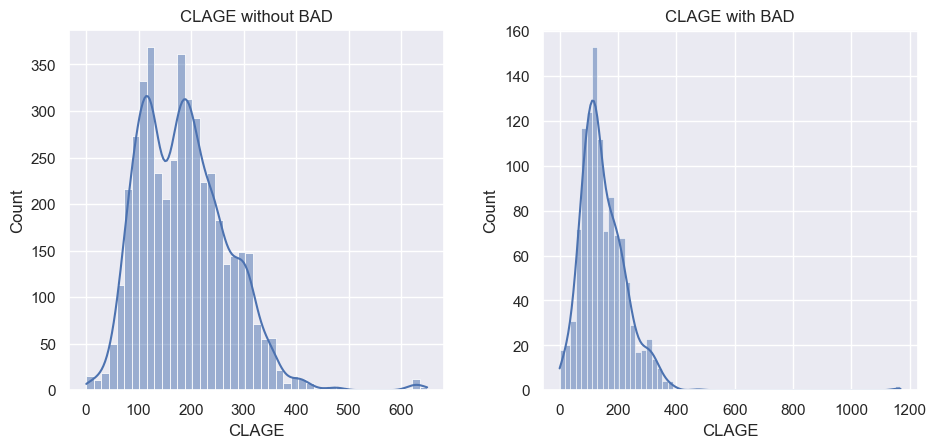

In [24]:
# Histograms for CLAGE and CLNO plotted in order to explore in more detail if they are similar to a normal distribution
fig, axes=plt.subplots(1,2,figsize=(10,5))
fig.tight_layout(pad=3.2)
sns.histplot(x="CLAGE",data=data[data.BAD==0],kde=True,ax=axes[0]).set(title="CLAGE without BAD");
sns.histplot(x="CLAGE",data=data[data.BAD==1],kde=True,ax=axes[1]).set(title="CLAGE with BAD");

<ul>
    <li>Interestingly, the distribution for <b>CLAGE</b> is bimodal, and at this resolution it is evident that it is not normally distributed. As a furhter step, we will check if the presence of two modes depends on the different <b>BAD</b> groups</li>
    <li>Even if <b>CLNO</b> has some skew on the right side, it looks more normally distributed (mode and median are almost the same, as checked in the following code block). This is an approximation, in fact the outcome of the Shapiro test performed below gives that we have sufficient evidence to say that sample does not come from a normal distribution. </li>
</ul>

In [25]:
# Ho: Sample is from the normal distributions. 
# Ha: Sample is not from the normal distributions.
# Significance level α=0.05
print(stats.shapiro(data.CLNO.dropna(inplace=False)))
# We reject the null HP

np.mean(data.CLNO),np.median(data.CLNO.dropna(inplace=False)) # Mean and median are similar

ShapiroResult(statistic=0.9665298461914062, pvalue=1.5705727215926293e-34)


(21.29609620076682, 20.0)

A further step is analyzing if there is any relevant change in statistics after grouping by <b>BAD</b> groups.

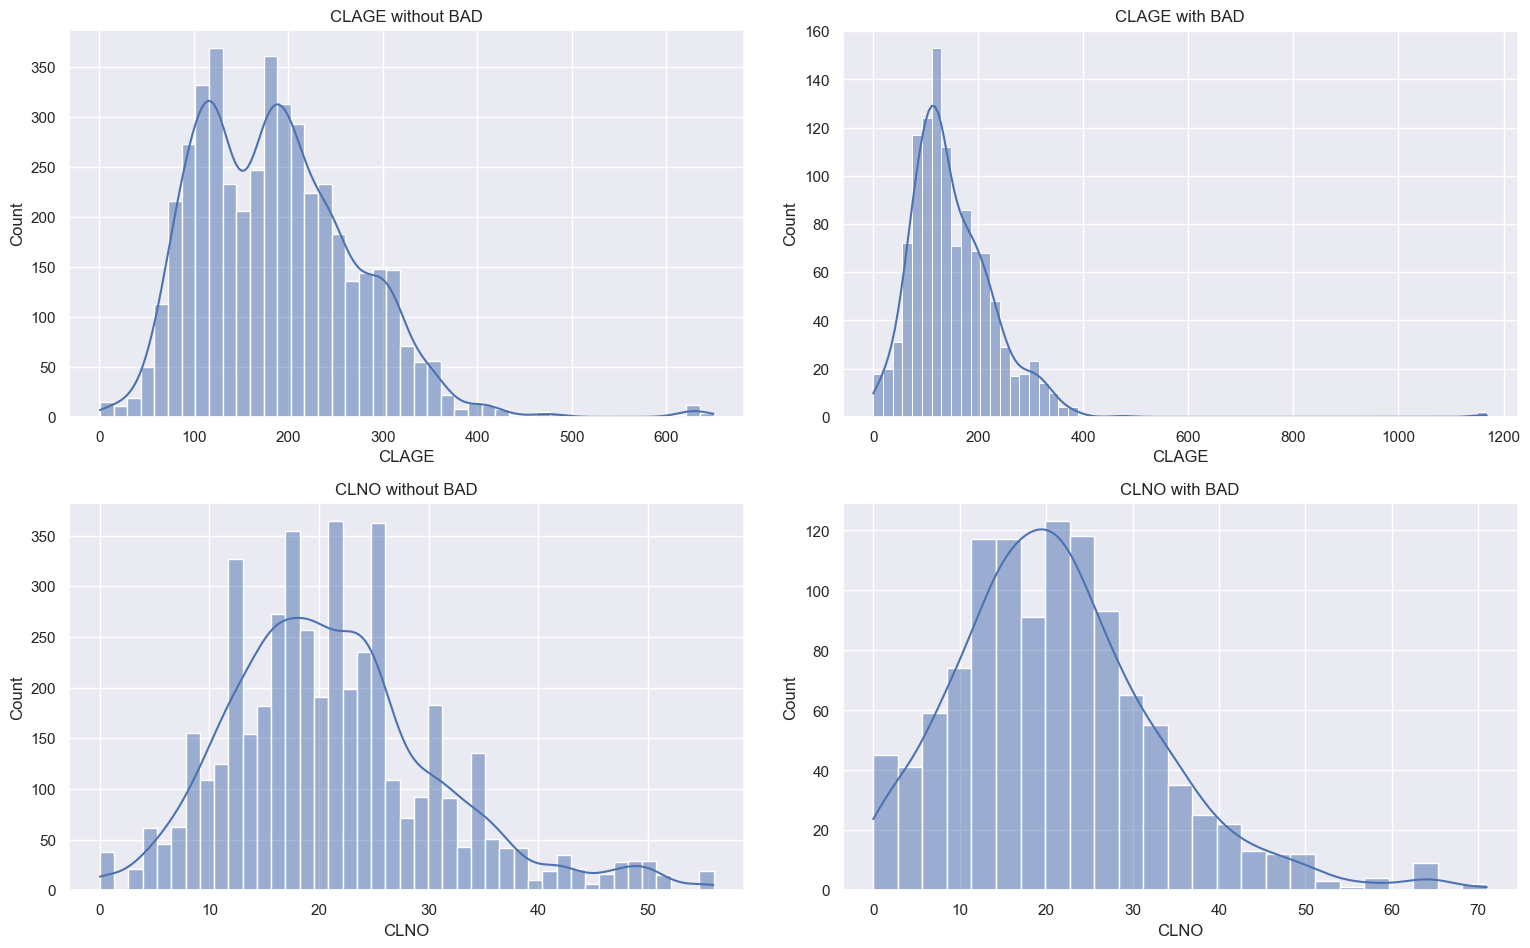

In [26]:
# Histograms for CLAGE and CLNO after grouping by BAD
fig, axes=plt.subplots(2,2,figsize=(16,10))
fig.tight_layout(pad=3.2)
sns.histplot(x="CLAGE",data=data[data.BAD==0],kde=True,ax=axes[0,0]).set(title="CLAGE without BAD");
sns.histplot(x="CLAGE",data=data[data.BAD==1],kde=True,ax=axes[0,1]).set(title="CLAGE with BAD");
sns.histplot(x="CLNO",data=data[data.BAD==0],kde=True,ax=axes[1,0]).set(title="CLNO without BAD");
sns.histplot(x="CLNO",data=data[data.BAD==1],kde=True,ax=axes[1,1]).set(title="CLNO with BAD");

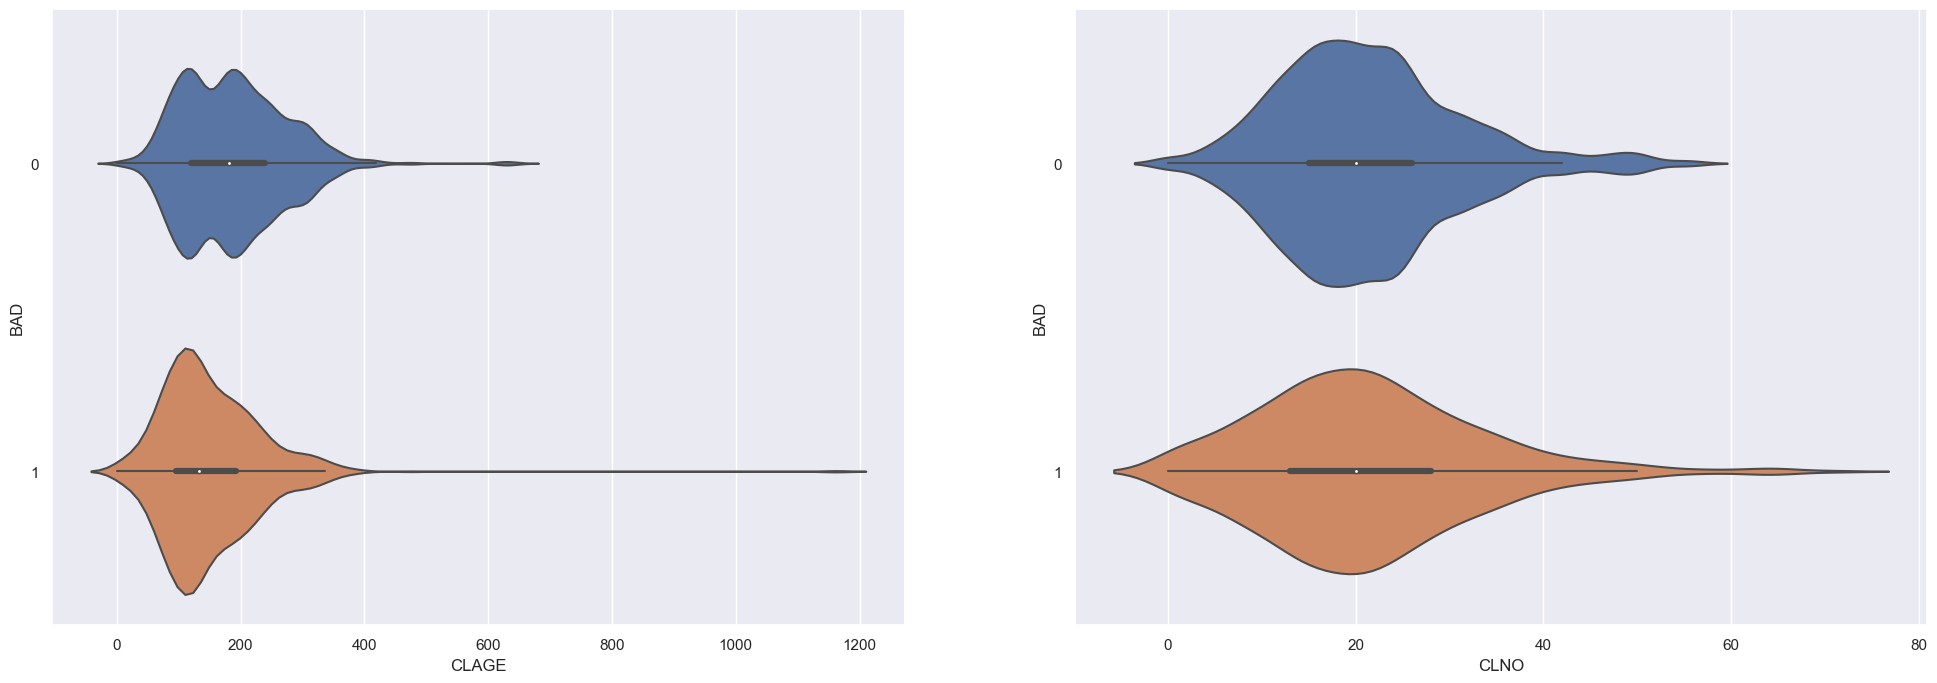

In [27]:
# Violin plots for CLAGE and CLNO after grouping by BAD
plt.figure(figsize=(10,8))
plt.subplots_adjust(right=2)
plt.subplot(121)
sns.violinplot(y="BAD",x="CLAGE",data=data,orient='h');
plt.subplot(122)
sns.violinplot(y="BAD",x="CLNO",data=data,orient='h');

<ul>
    <li>The bimodal distribution of <b>CLAGE</b> is preserved only for not <b>BAD</b> applicants, implying that this structure depends more on general patterns in the global distribution rather than on the distributions conditioned on <b>BAD</b>. Nonethless, the two distributions are quite different, and the one on the right is unimodal and more right-skewed. Therefore, the median of each group will work as input.</li>
    <li>The normal properties of <b>CLNO</b> are preserved after the grouping. With the exception of some outliers, the statistics of the two subgroups of the variable are pretty comparable, therefore we can input the mean.</li>
</ul>
Before replacing the missing values according to the strategies discussed, an outlier analysis will be performed in order to minimize the risk of capturing the noise.

## **Outlier detection and treatment**

We already explored and provided insights about the distribution of numerical data through histograms.
Let's take a closer look at the summary statistics, then boxplots are analyzed to detect outliers.

**Numerical variables without missing values and those for which it was assessed that the two BAD groups have no impact on the variable concerned**

In [28]:
# Collecting names of numerical variables into two separate lists
numVariables_group1=["LOAN","MORTDUE","VALUE","YOJ","CLNO"]
numVariables_group2=list(set(num_columns)-set(numVariables_group1))

# Changing the seaborn style to make plots more appealing
sns.set_style("whitegrid") 

In [29]:
# Check summary for this group of numerical data
data[numVariables_group1].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.00,89900.0
MORTDUE,5442.0,73760.817200,44457.609458,2063.0,46276.0,65019.0,91488.00,399550.0
VALUE,5848.0,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
YOJ,5445.0,8.922268,7.573982,0.0,3.0,7.0,13.00,41.0
CLNO,5738.0,21.296096,10.138933,0.0,15.0,20.0,26.00,71.0


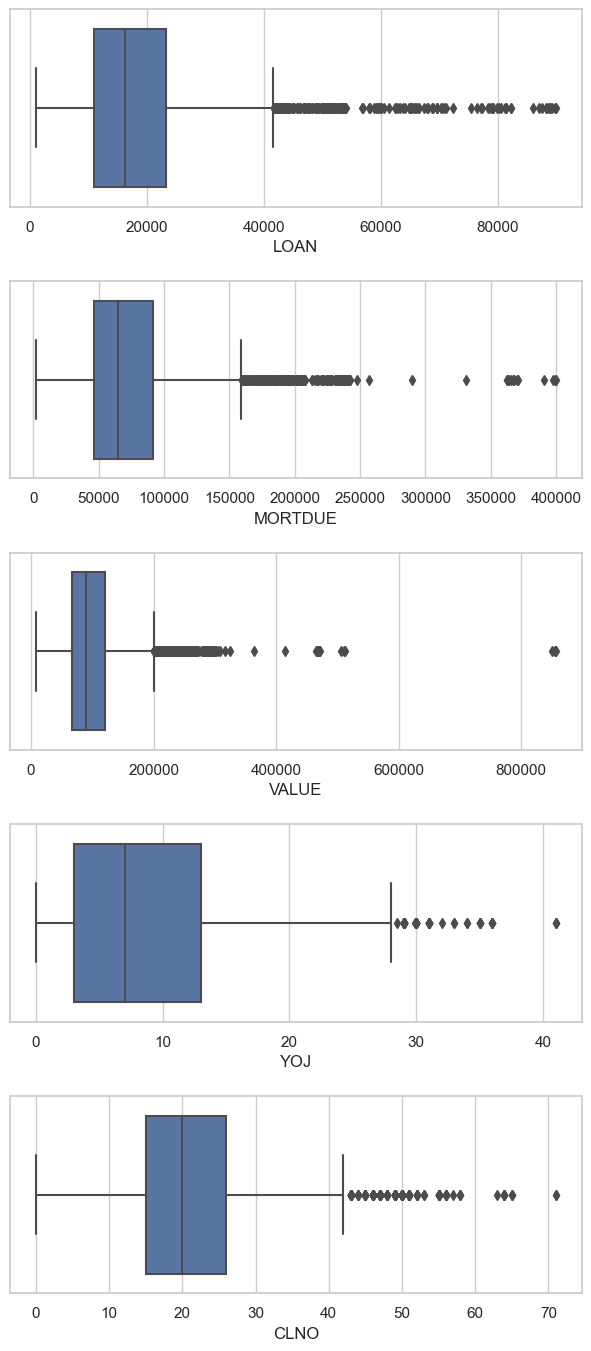

In [30]:
# Boxplots for LOAN, MORTDUE, VALUE, YOJ and CLNO before outlier treatment
fig, axes=plt.subplots(5,1,figsize=(7,14))
fig.tight_layout(pad=2.5)
for i,col in enumerate(numVariables_group1):
    sns.boxplot(x= data[col],orient='v',ax=axes[i])
    i+=1

<ul>
    <li>Even if <b>LOAN</b> is heaviliy skewed to the right, the line beyond the vertical segment marking the 1,5 IQR on the right is rather continuous, denoting that they represent a general trend and should not be treated.</li>
    <li><b>MORTDUE</b> has a relevant right-skew, but the outlier queue is unterrupted by a large gap. The upper side of this variable will be capped to an adequate percentile, since most values beyond third quartile are inflated too much. This gap is present in <b>VALUE</b> as well, and it will be treated accordingly.</li>
    <li><b>YOJ</b> is right-skewed, and this represents a general trend as previously stated. The most extreme right value does not require treatment as it is just the applicants with higher seniority in its job role.</li>
    <li><b>CLNO</b> is skewed to the right, and this represents a general trend. However, the global median and global mean are the same, therefore we can treat it as if it was almost normally distributed, as checked through histograms. Nonethless, since the strategy defined for NaNs treatment replaces with the mean, a little cap is suggested.</li>
</ul>
In the following code blocks, outliers are managed as stated.

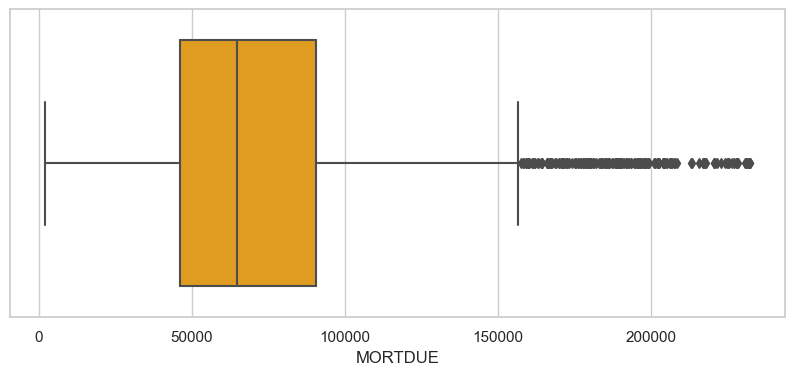

In [31]:
# Treating MORTDUE
plt.figure(figsize=(10,4))
q=np.percentile(a=data.MORTDUE.dropna(inplace=False),q=99)
sns.boxplot(x= data.MORTDUE[data.MORTDUE<q],orient='v',color='orange');

In [32]:
# Capping values accordingly
data["MORTDUE"][data.MORTDUE>q]=q

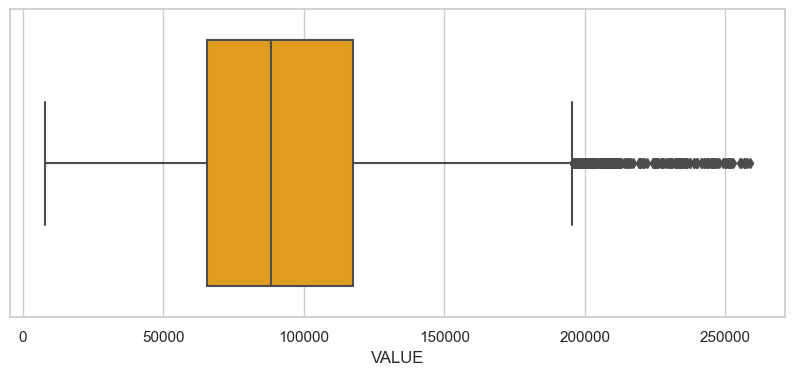

In [33]:
# Treating VALUE
plt.figure(figsize=(10,4))
q=np.percentile(a=data.VALUE.dropna(inplace=False),q=98)
sns.boxplot(x= data.VALUE[data.VALUE<q],orient='v',color='orange');

In [34]:
# Capping values accordingly
data["VALUE"][data.VALUE>q]=q

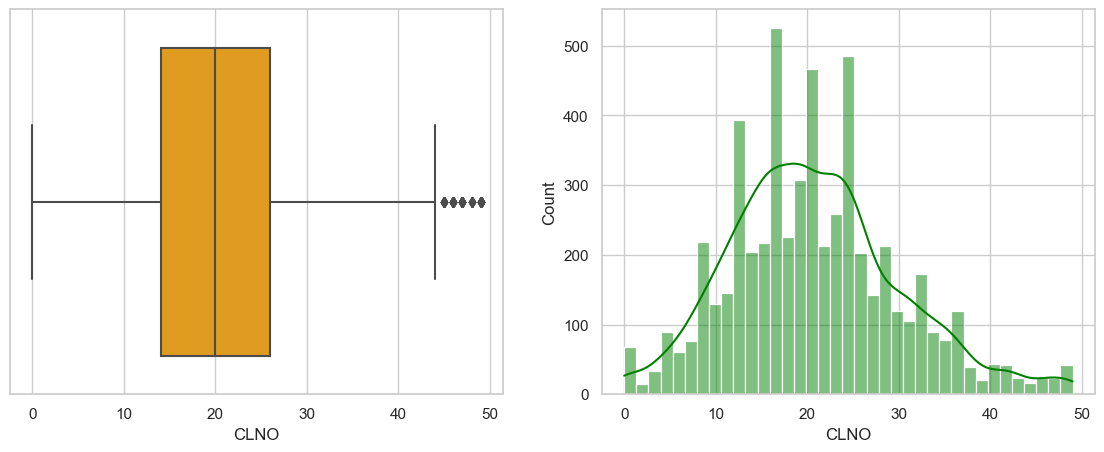

In [35]:
# Treating CLNO
q=np.percentile(a=data.CLNO.dropna(inplace=False),q=99)
fig, axes=plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x= data.CLNO[data.CLNO<q],orient='v',color='orange',ax=axes[0]);
sns.histplot(x="CLNO",data=data[data.CLNO<q],kde=True,color='green',ax=axes[1]);

After treatment, the outliers in <b>CLNO</b> become equally spaced, thus avoiding the noise whilst retaining this right-skew tendency. 

In [36]:
# Capping values accordingly
data["CLNO"][data.CLNO>q]=q

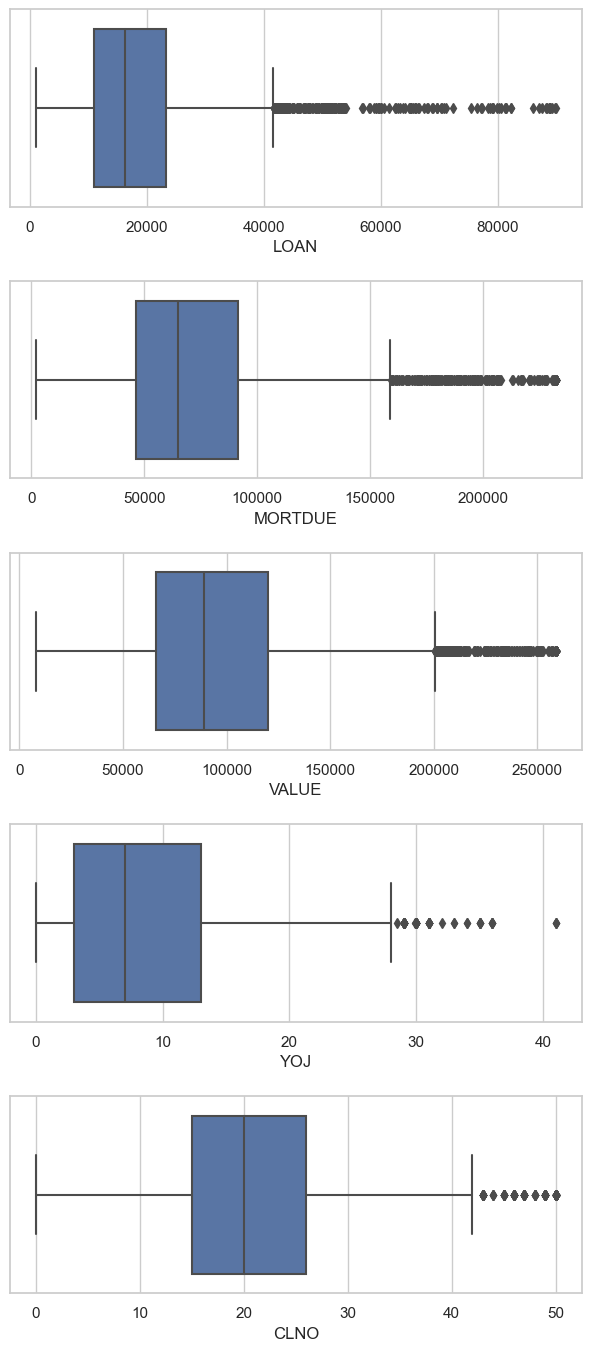

In [37]:
# Boxplots for LOAN, MORTDUE, VALUE, YOJ and CLNO after outlier treatment
fig, axes=plt.subplots(5,1,figsize=(7,14))
fig.tight_layout(pad=2.5)
for i,col in enumerate(numVariables_group1):
    sns.boxplot(x= data[col],orient='v',ax=axes[i])
    i+=1

**Numerical variables for which it was assessed that the two BAD groups have an impact on the variable concerned**

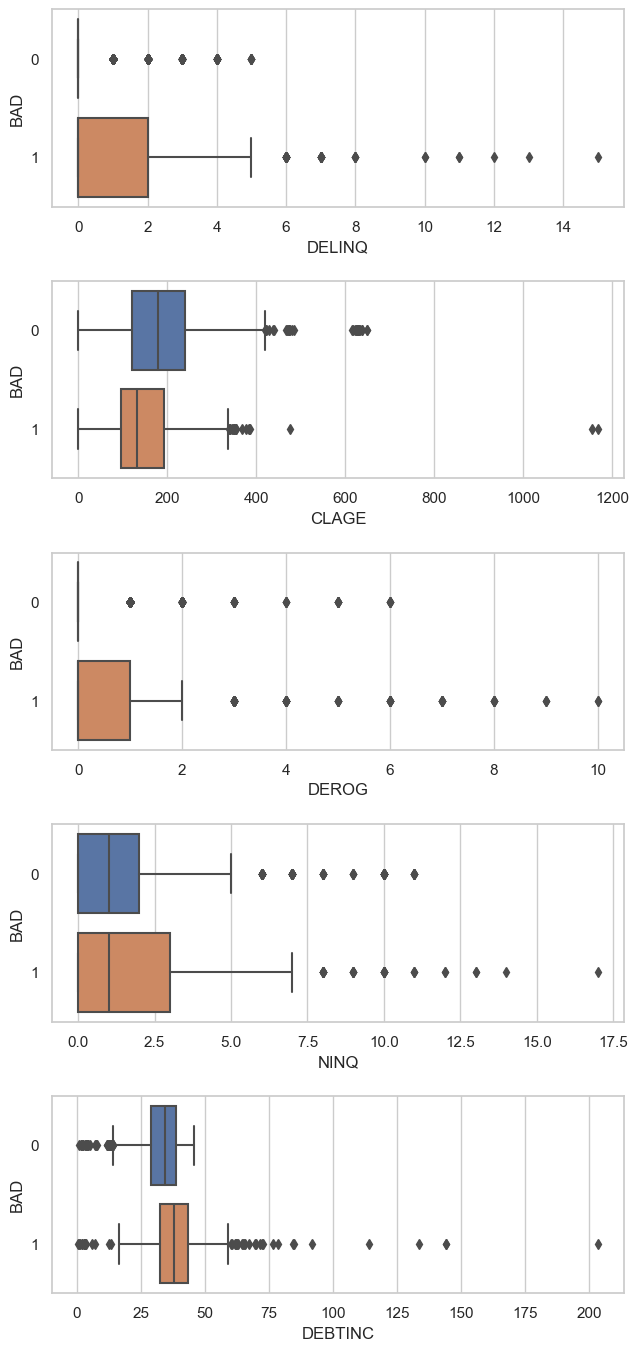

In [38]:
# Boxplots for DEROG, NINQ, DEBTINC, CLAGE and DELINQ before outlier treatment
fig, axes=plt.subplots(5,1,figsize=(7,14))
fig.tight_layout(pad=2.5)
for i,col in enumerate(numVariables_group2):
    sns.boxplot(x= data[col],y=data["BAD"],orient='h',ax=axes[i])
    i+=1

<ul>
    <li><b>DEROG</b>, <b>NINQ</b> and <b>DELINQ</b> are right-skewed by definition, and this characteristcs is more evident for <b>BAD</b> group. Since it represent a structural patter, there is no need to treat.</li>
    <li><b>CLAGE</b> and <b>DEBTINC</b> have too extreme values inside <b>BAD</b> group, they need a treatment.</li>
</ul>
Anyway, all noise that requires a treatment comes from the <b>BAD</b> group.

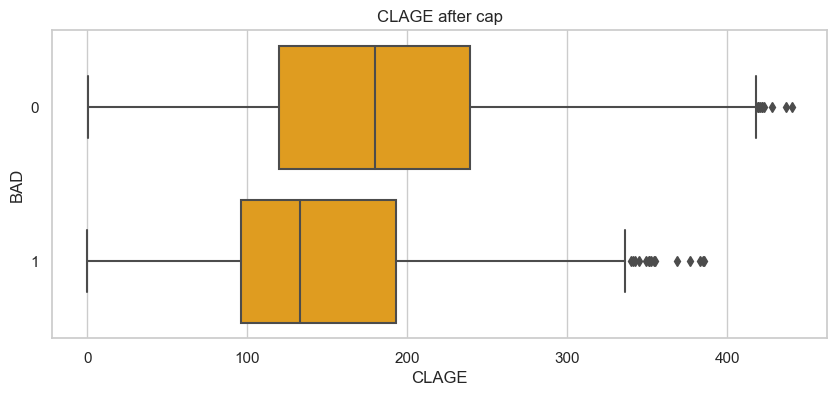

In [39]:
# Treating CLAGE
plt.figure(figsize=(10,4))
q=np.percentile(a=data.CLAGE.dropna(inplace=False),q=99.5)
sns.boxplot(x= data.CLAGE[data.CLAGE<q],y=data["BAD"],orient='h',color='orange').set(title="CLAGE after cap");

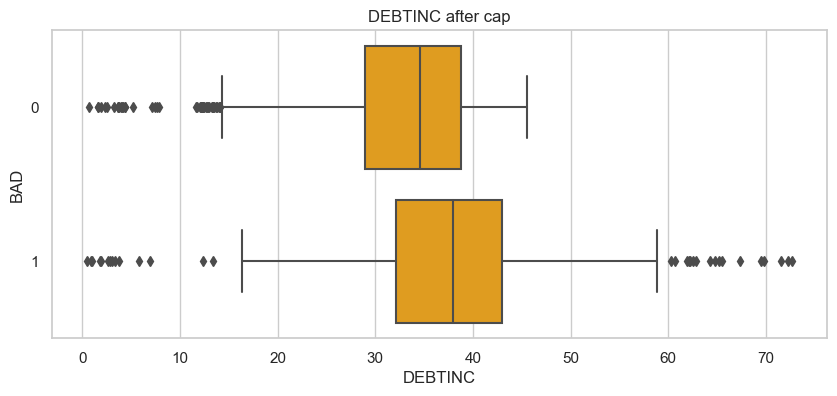

In [40]:
# Capping values accordingly
data["CLAGE"][data.CLAGE>q]=q

# Treating DEBTINC
plt.figure(figsize=(10,4))
q=np.percentile(a=data.DEBTINC.dropna(inplace=False),q=99.8)
sns.boxplot(x= data.DEBTINC[data.DEBTINC<q],y=data["BAD"],orient='h',color='orange').set(title="DEBTINC after cap");

In [41]:
# Capping values accordingly
data["DEBTINC"][data.DEBTINC>q]=q

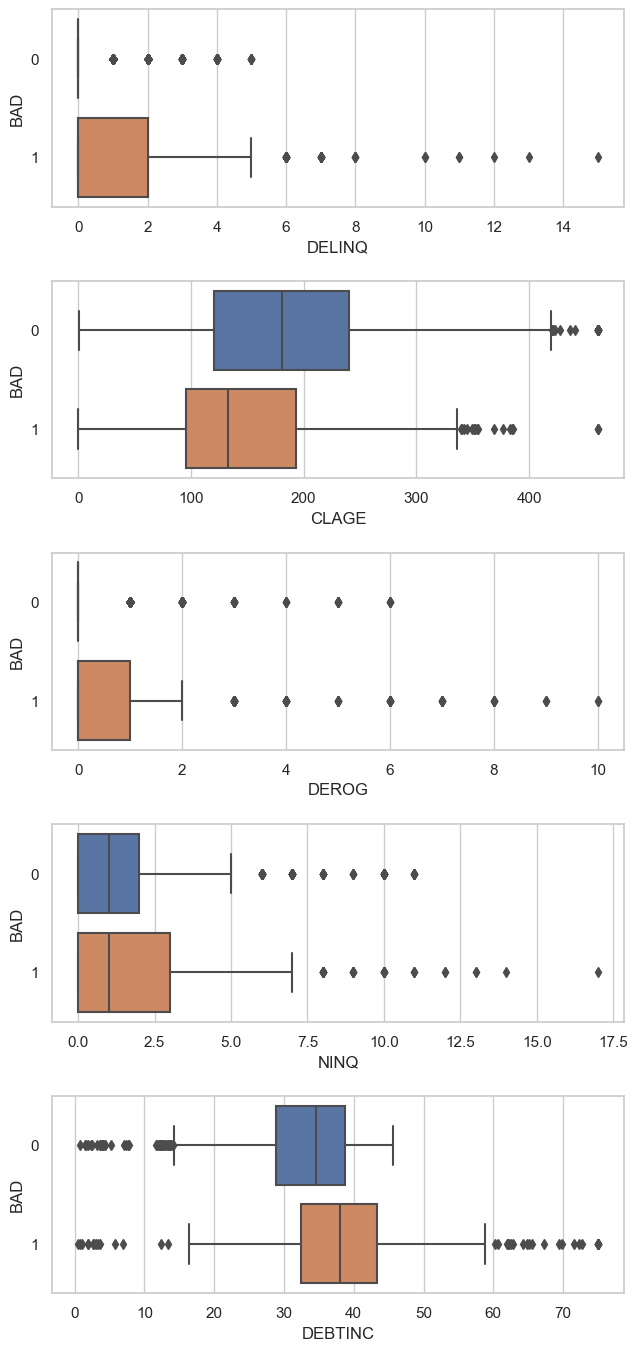

In [42]:
# Boxplots for DEROG, NINQ, DEBTINC, CLAGE and DELINQ after outlier treatment
fig, axes=plt.subplots(5,1,figsize=(7,14))
fig.tight_layout(pad=2.5)
for i,col in enumerate(numVariables_group2):
    sns.boxplot(x= data[col],y=data["BAD"],orient='h',ax=axes[i])
    i+=1

**Categorical variables**

In [43]:
# Check summary for categorical data 
data.describe(include="category").T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


<b>BAD</b> and <b>REASON</b> are binary variables, <b>JOB</b> is multinomial.<br>
Every categorical column has some missing values.<br>
Plots below show the countplots of <b>REASON</b> and <b>JOB</b> variables with all values and with their distribution grouped by classes in <b>BAD</b>.

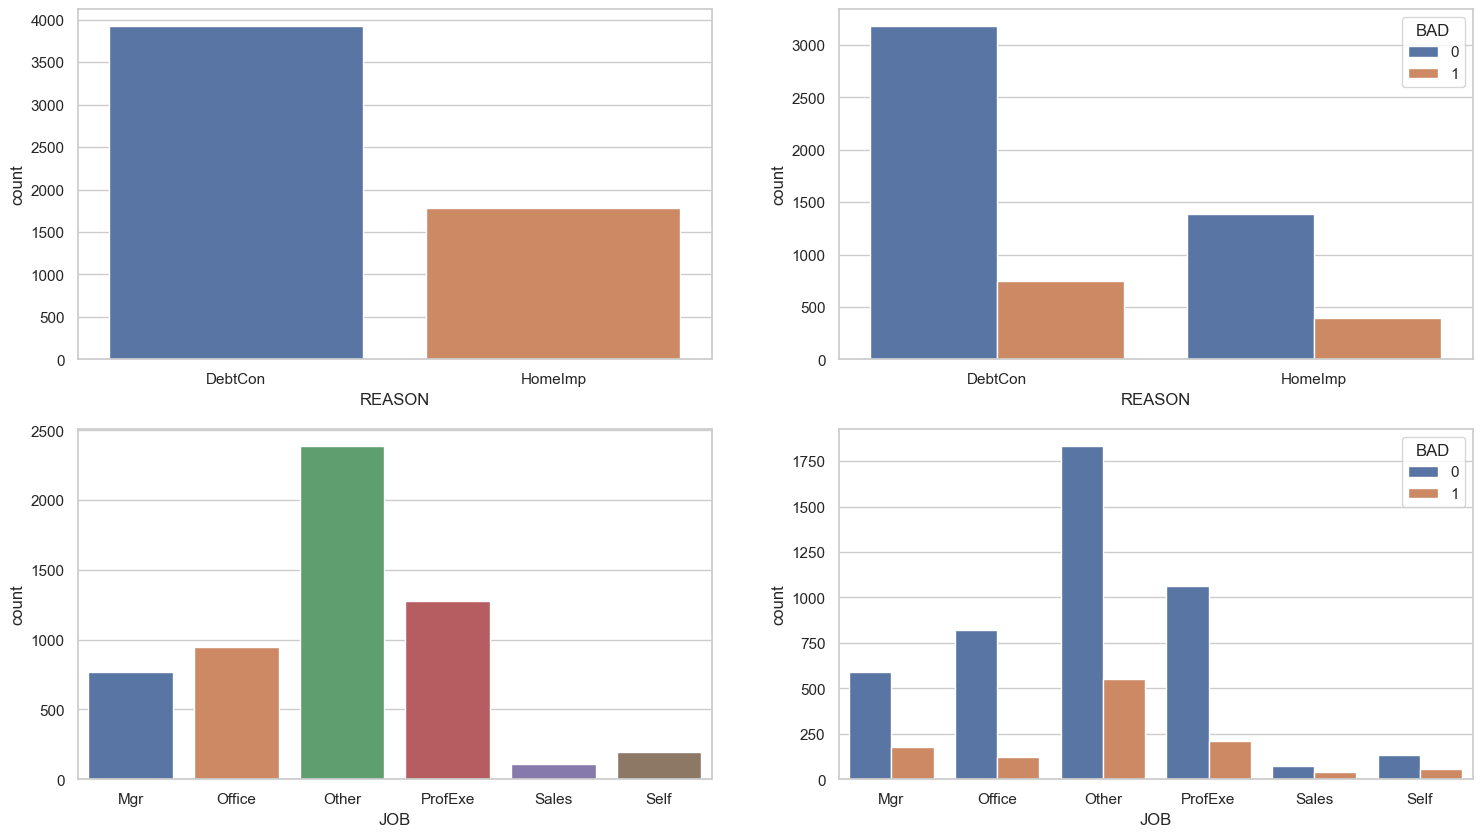

In [44]:
# Countplots for REASON and JOB
fig,axes=plt.subplots(2,2,figsize=(18,10))
sns.countplot(ax=axes[0,0],x="REASON",data=data);
sns.countplot(ax=axes[0,1],x="REASON",data=data,hue="BAD");
sns.countplot(ax=axes[1,0],x="JOB",data=data);
sns.countplot(ax=axes[1,1],x="JOB",data=data,hue="BAD");

<ul>
    <li>DebtCon is the mode of <b>REASON</b>. It is the mode also in each of the two <b>BAD</b> categories.</li>
    <li>Same for <b>JOB</b>, where in both graphics Other is the mode, followed by ProfExe.</li>
</ul>
Since the mode before grouping and after grouping by <b>BAD</b> in both variables is the same, the strategy to deal with missing values will be simply mode imputation.

Adding binary flag for Nan/not Nan

In [45]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)    
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [46]:
all_variables=data.columns.tolist()
all_variables.remove("BAD"),all_variables.remove("LOAN")
for item in all_variables:
    if not item.endswith('_missing_values_flag'):
        data=add_binary_flag(data,item)

### **Treating missing values**

In [47]:
# Defining a function to fill missing values per category in BAD
def fillNaN_BAD(dataset,col,method):
    if method=="median":
        dataset[col][dataset.BAD==0]=dataset[col][dataset.BAD==0].replace(np.nan,dataset[col][dataset.BAD==0].median()) 
        dataset[col][dataset.BAD==1]=dataset[col][dataset.BAD==1].replace(np.nan,dataset[col][dataset.BAD==1].median())
    elif method=="mean":
        dataset[col][dataset.BAD==0]=dataset[col][dataset.BAD==0].replace(np.nan,dataset[col][dataset.BAD==0].mean()) 
        dataset[col][dataset.BAD==1]=dataset[col][dataset.BAD==1].replace(np.nan,dataset[col][dataset.BAD==1].mean())

Filling missing values based on <b>BAD</b> category for numerical features

In [48]:
# DEROG
fillNaN_BAD(data,"DEROG","mean")

# DELINQ
fillNaN_BAD(data,"DELINQ","mean")

# NINQ
fillNaN_BAD(data,"NINQ","mean")

# DEBTINC
fillNaN_BAD(data,"DEBTINC","median")

# CLAGE
fillNaN_BAD(data,"CLAGE","median")

Filling missing values for numerical features

In [49]:
# MORTDUE
data["MORTDUE"].fillna(hm.MORTDUE.median(),inplace=True)

# VALUE
data["VALUE"].fillna(hm.VALUE.median(),inplace=True)

# YOJ
data["YOJ"].fillna(hm.YOJ.median(),inplace=True)

# CLNO
data["CLNO"].fillna(hm.CLNO.mean(),inplace=True)

Filling missing values for categorical features

In [50]:
# REASON
data["REASON"].fillna(hm.REASON.mode()[0],inplace=True)

# JOB
data["JOB"].fillna(hm.JOB.mode()[0],inplace=True)

In [51]:
# Saving the newly created dataframe
#data.to_csv(os.path.join(pathname,'dataWithOutliers.csv'), index=False)

**Some models are not sensitive to outliers, for instance Decision Trees. A copy of original data without outlier treatment is provided. Missing values are treated according to strategies defined previously.**

In [52]:
# Copying data to another variable to avoid any changes to original data
data1=hm.copy()

for item in all_variables:
    if not item.endswith('_missing_values_flag'):
        data1=add_binary_flag(data1,item)

# Casting LOAN to float64
data1.LOAN=data1.LOAN.astype("float64")
cols = data1.select_dtypes(['object']).columns.tolist()

# Changing the data type of object type column to category
for i in cols:
    data1[i] = data1[i].astype("category")

In [53]:
# DEROG
fillNaN_BAD(data1,"DEROG","mean")

# DELINQ
fillNaN_BAD(data1,"DELINQ","mean")

# NINQ
fillNaN_BAD(data1,"NINQ","mean")

# DEBTINC
fillNaN_BAD(data1,"DEBTINC","median")

# CLAGE
fillNaN_BAD(data1,"CLAGE","median")

# MORTDUE
data1["MORTDUE"].fillna(hm.MORTDUE.median(),inplace=True)

# VALUE
data1["VALUE"].fillna(hm.VALUE.median(),inplace=True)

# YOJ
data1["YOJ"].fillna(hm.YOJ.median(),inplace=True)

# CLNO
data1["CLNO"].fillna(hm.CLNO.mean(),inplace=True)

# REASON
data1["REASON"].fillna(hm.REASON.mode()[0],inplace=True)

# JOB
data1["JOB"].fillna(hm.JOB.mode()[0],inplace=True)

In [54]:
# Saving the newly created dataframe
#data1.to_csv(os.path.join(pathname,'dataWithoutOutliers.csv'), index=False)